# Air_passenger-predict_Time_series_forecasting

In [1]:
import pandas as pd 
import  numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
# 
import statsmodels.api as sm 
#statsmodels.api : sử dụng cho các phân tích thống kê, mô hình hóa dữ liệu và kiểm tra giả thuyết.
 
from statsmodels.tsa.seasonal import seasonal_decompose
# seasonal_decompose 
# model  statsmodels.tsa.seasonal 
# ex :  trend, seasonal, resid


# load the data 


In [2]:
df = pd.read_csv("AirPassengers.csv")
df.set_index("Month", inplace=True) 
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


# exploratory data analysis 

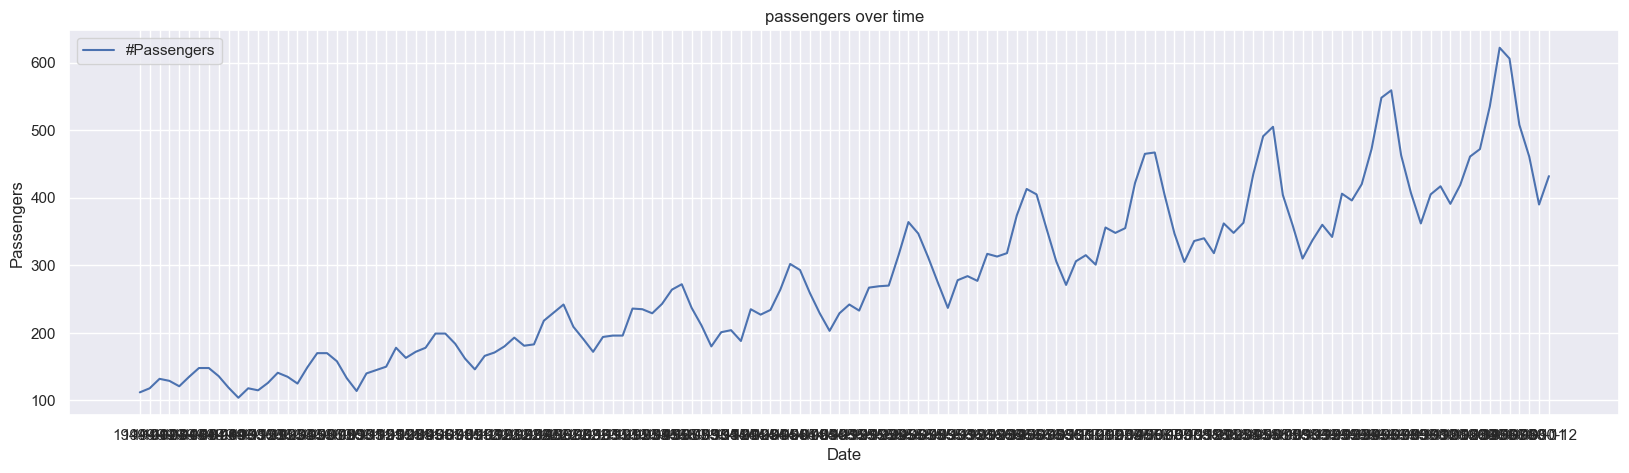

In [22]:
plt.figure (figsize=(20,5)) 
plt.plot(df.index, df['#Passengers'], label= '#Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title("passengers over time")
plt.legend() 
plt.show()


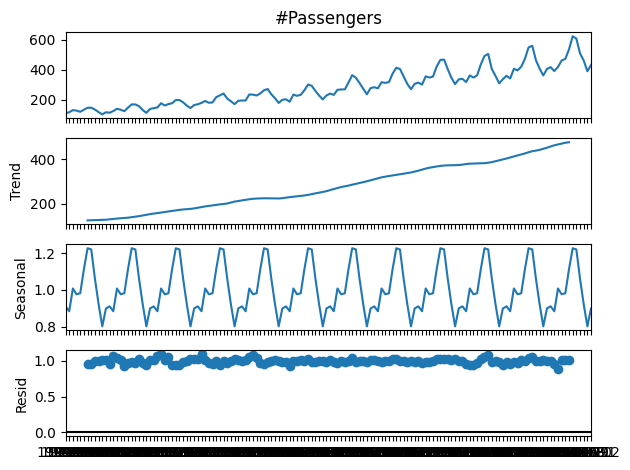

In [4]:
# perform seasonal decomposition 

# model multiplicative =  " Observed=Trend×Seasonal×Residual "
# prediod = 12 (monthly data)
result = seasonal_decompose (df['#Passengers'], model="multiplicative" , period=12)
result.plot()
plt.show()

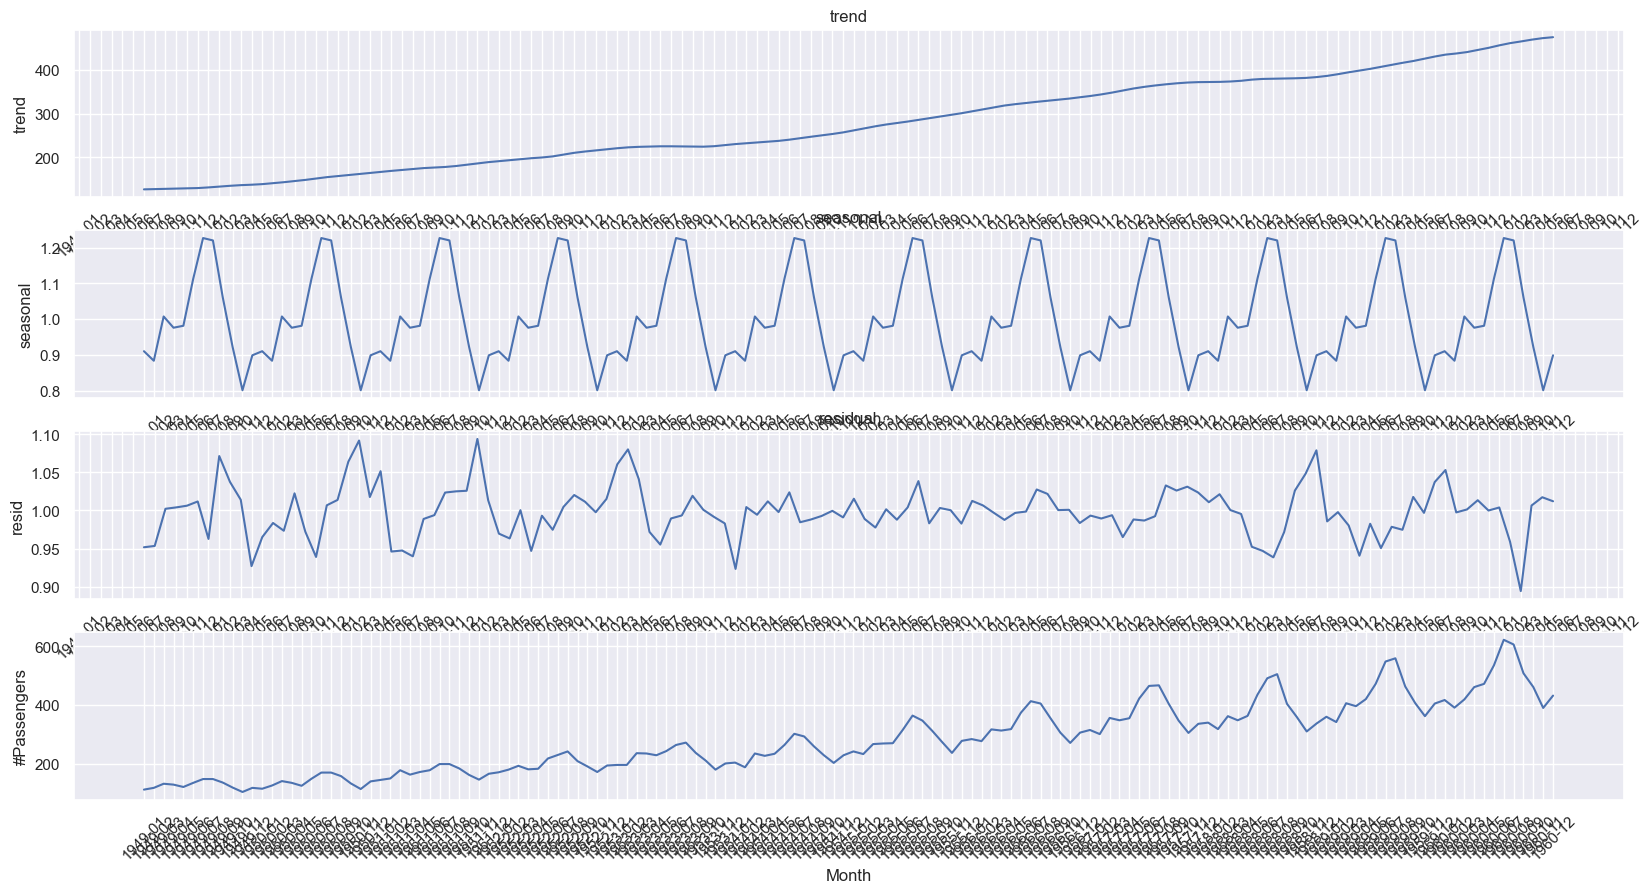

In [5]:
# plot the components in the graph
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))

# trend component
plt.subplot(411) # 4 rows , 1 columns, 1 index  
sns.lineplot(data = result.trend)
plt.title("trend")
plt.xticks(rotation=45)

# seasonal coponent
plt.subplot(412)
sns.lineplot(data = result.seasonal)
plt.title("seasonal")
plt.xticks(rotation=45)

# residual component
plt.subplot(413)
sns.lineplot(data = result.resid)
plt.title('residual')
plt.xticks(rotation=45)



# original data 
plt.subplot(414)
sns.lineplot(data = df['#Passengers'])
plt.xticks(rotation= 45)
# ----------------------------------------
plt.show()




- autolag = "AIC" : ADF test  can use  "multiple delays (lag)" # multipel : nhiều  
- autu chose  number (lag)  tối ưu dựa trên tiêu chí AIC (Akaike Information Criterion)

+ p-value : 
- < 0.05 :  stop chain (chuỗi dừng) -> can be used  "directily for ARIMA"
- > 0.05 :  not stop chain          -> further processing requied (prcessing :xử lý )

In [6]:
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller test : ADF.
#độ trễ tối ưu cho bài kiểm tra Augmented Dickey-Fuller (ADF) 
# dựa trên tiêu chí thông tin Akaike (Akaike Information Criterion - AIC).
result = adfuller(df['#Passengers'], autolag='AIC')
# result[0] = test statistic
# result[1] = p-value

print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 0.8153688792060482
p-value: 0.991880243437641


+ diff()  : lấy sai phân bậc 1 của chuỗi 
- ex : array [112, 118, 132, 129]

- used .diff() = [NaN, 6, 14, -3] 
- 118 - 112 = 6
- 132 - 118 = 14
- 129 - 132 = -3

+ dropna() :  loại bỏ giá trị NaN ở đầu chuỗi 

=> có td : .diff() giúp biến một chuỗi không ổn định (không dừng) thành một chuỗi ổn định (dừng) 
ex td :  
+ chuỗi gốc : [ 5   6   7   8   9   10   11  (tăng đều) ]
+ Sau .diff(): NaN   1   1   1   1    1    1


In [7]:
# first order diferencing
result = adfuller(df['#Passengers'].diff().dropna(),autolag='AIC')
# td : .diff() : Loại bỏ xu hướng (trend) và làm cho chuỗi ổn định (dừng)  
print ('ADF statistic : ', result[0])
print ('p-value : ', result[1])

ADF statistic :  -2.8292668241699994
p-value :  0.0542132902838255


In [8]:
# second order differencing
result = adfuller(df['#Passengers'].diff().diff().dropna(), autolag='AIC')
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.384231542468505
p-value: 2.7328918500142407e-29


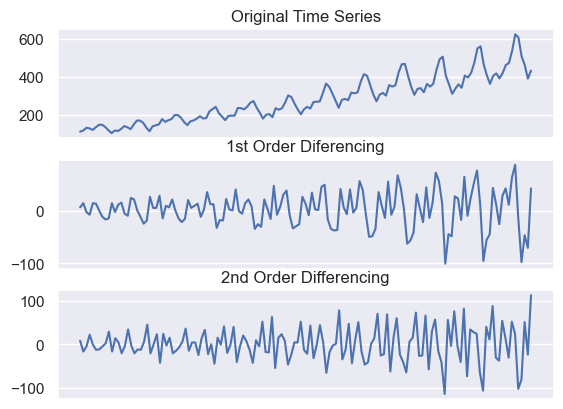

In [9]:
# plot the differencing values 
# sublot : columns = 1 
# fig : figure with 3 rows and 1 column
# Tạo 3 subplot (3 trục dọc) và gán từng trục vào biến riêng
fig,(ax1 , ax2, ax3) = plt.subplots(3) 

ax1.plot(df)
ax1.set_title('Original Time Series')
ax1.axes.xaxis.set_visible(False)

ax2.plot(df.diff())
ax2.set_title('1st Order Diferencing')
ax2.axes.xaxis.set_visible(False)

ax3.plot(df.diff().diff())
ax3.set_title('2nd Order Differencing')
ax3.axes.xaxis.set_visible(False)

plt.show()

# Define Paramaters for ARIMA

- p = 0 # MA - Moving Average - PACF  
+ AutoRegressive (AR) : Số lượng quan sát trễ (lag) dùng làm đầu vào 
-------------------
- d = 1 # order of differencing - I
+ Differencing : Số lần lấy sai phân (diff) để làm chuỗi trở nên dừng
-------------------
- q = 0 # AR - Auto Regressive - ACF
+ Moving Average (MA)  : Số lượng sai số trễ (error terms) đưa vào mô hình

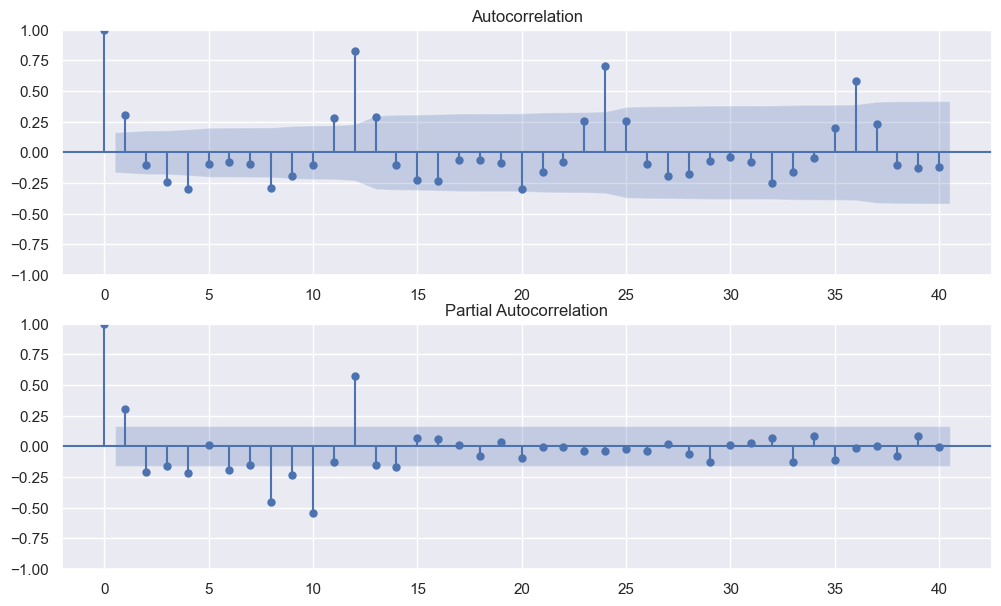

In [10]:

fig, ax = plt.subplots(2, 1 , figsize=(12, 7))
sm.graphics.tsa.plot_acf(df.diff().dropna(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(df.diff().dropna(), lags=40, ax=ax[1])
plt.show()

# model training 
- sd :  model SARIMAX 

-  ct SARIMAX  :  "y(t) = AR terms + MA terms + Seasonal terms + error"
Trong đó:

- y(t) là giá trị bạn muốn dự đoán tại thời điểm t.

- Các AR, MA, Seasonal là các thành phần được xây dựng từ dữ liệu trong quá khứ.

-------------------------------------------------------------------------------------------

-  viết tắt "Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors"

- "Là mô hình ARIMA có yếu tố mùa vụ (seasonal).

- Dùng để dự báo chuỗi thời gian (time series) có xu hướng, chu kỳ lặp lại, và biến động ngẫu nhiên. "



In [11]:
# ct : AR phần: y(t) = ϕ1 * y(t-1) + ϕ2 * y(t-2)
p = 2 # (AR - Autoregressive) : dùng 2 gtri gần nhất trong qk : của y(hoặc y' nếu đã diferenced)để dự đoán y(t)   


d = 1 # (Difference - sai phân cấp 1) : 
#- Loại bỏ xu hướng tăng đều trong dữ liệu bằng cách lấy hiệu của giá trị hiện tại với giá trị trước đó.
#- ct : y'(t) = y(t) - y(t-1)  \\ ex : Feb: 6   (118 - 112)  , Mar: 14  (132 - 118)...
 

q = 1 # (Tạo MA terms) : MA phần: + θ1 * e(t-1) 
# e(t-1) là sai số giữa giá trị thực tế và dự đoán ở thời điểm trước.

# p, d, q 
- p : Autoregressive : dùng mấy tháng gần đây để dự đoán 

- d : Diference : Có cần trừ bớt xu hướng tăng đều ko 
(giống như "loại bỏ sự tăng đều để dễ dự đoán")

- q : moveing average : dùng lỗi đoán sai  trước đó để cải thiện dự đoán 

-P,D ,Q : giống p,d,q

In [12]:
# Thêm yếu tố mùa vụ (seasonal_order)

P = 1  # sd : y(t-12) => gtr của 12 tháng trước
D = 0 
Q = 3  # sd : sai số t-12 , t-24 , t-36
# Mục đích: Bắt được "chu kỳ lặp lại ", ví dụ tháng 1 năm nay giống tháng 1 năm ngoái. 

In [13]:
seasonal_period = 12 

# model SARIMAX là "máy đoán số"
- Bạn đưa vào một chuỗi số theo thời gian → Nó học mối quan hệ giữa các số trong quá khứ → để dự đoán số tiếp theo.

- "Tháng  	Hành khách
   + Th1	     100
   + Th2	     120
   + Th3	     ???"

- model học  : 
1. Trend  : số khách có tăng dần  ko ? 

2. Seasonality : (mùa vụ) : tháng nào đông , tháng nào vắng

3. Quan hệ giữa tháng  hiện tại và quá khứ :
   + Nếu tháng trước tăng → tháng này có tăng không?
 
   + Tháng này ảnh hưởng bởi tháng trước bao nhiêu?

   + Có lặp lại giống tháng cùng kỳ năm trước không?


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['#Passengers'], order = (p,d,q), seasonal_order=(P,D,Q, seasonal_period))
fitted_model = model.fit()
print(fitted_model.summary())

d:\Tool\Tool_anaconda\run_anaconda\envs\ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Tool\Tool_anaconda\run_anaconda\envs\ml\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
d:\Tool\Tool_anaconda\run_anaconda\envs\ml\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
d:\Tool\Tool_anaconda\run_anaconda\envs\ml\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                         SARIMAX Results                                          
Dep. Variable:                                #Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, [1, 2, 3], 12)   Log Likelihood                -563.224
Date:                                    Sun, 27 Apr 2025   AIC                           1142.448
Time:                                            00:25:21   BIC                           1166.151
Sample:                                        01-01-1949   HQIC                          1152.080
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6247      0.101      6.168      0

d:\Tool\Tool_anaconda\run_anaconda\envs\ml\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# quy trình  predict  y(t+1) với model SARIMAX: 

----------------------------------------------------------------
-  ϕ1 * y(t) + 
-  ϕ2 * y(t-1) + 

-  θ1 * e(t) + 
-  Φ1 * y(t-12) + 
-  Θ1 * e(t-12) + ... + 

-  error 
----------------------------------------------------------------

ex1 :
+ ϕ₁ × y(t)
+ ϕ₂ × y(t-1)


- Đây là phần Autoregressive (AR) – nghĩa là:
- "Tôi dự đoán y(t+1) dựa vào chính những giá trị quá khứ như y(t), y(t-1)"
- Các ϕ là hệ số học được sau khi fit mô hình

ví dụ :  y(t+1) = 0.5 × y(t) + 0.2 × y(t-1)
=> Dự đoán dựa vào 2 giá trị gần nhất.

--------------
ex2 : 
+ θ1 * e(t) +  

- Đây là phần Moving Average (MA):
- e(t) là lỗi của lần dự đoán trước → Mô hình dùng lỗi đó để chỉnh lại dự đoán tiếp theo.
- θ là hệ số học được.
-> Nó như nói: “Lần trước tôi đoán sai 10 đơn vị → lần này tôi rút kinh nghiệm, chỉnh lại 10×θ₁”.

---------------
ex3 : 
+ Φ₁ × y(t-12)

- Đây là phần Seasonal AR (P = 1, s = 12):
- dùng giá trị cách đây đúng 1 chu kỳ mùa vụ (ở đây là 12 tháng trước) để đoán hiện tại. 
->  Ví dụ: "Tháng 5 năm nay có thể giống tháng 5 năm ngoái" 

--------------
ex4 : 
+ Θ₁ × e(t-12)
- Đây là phần Seasonal MA (Q = 1, s = 12):
-> Giống như phần MA, nhưng dùng lỗi của dự đoán mùa vụ năm trước.

--------------
error :  Là phần "nhiễu trắng", mô hình không thể giải thích được.

# tóm lại 


=> P=1, Q=3, s=12	Bắt các chu kỳ lặp lại theo năm 

- models :  SARIMAX.fit()	Học ra các hệ số (AR, MA, seasonal) 

#-------------------------------------------------------
- Tham số	   Ý nghĩa đơn giản	                        Ghi nhớ

- p=2	      Nhìn lại 2 thời điểm gần nhất	            AR
- d=1	      Lấy sai phân để loại bỏ xu hướng tăng   	Difference
- q=1	      Dùng lỗi trước đó để hiệu chỉnh	        MA
- P=1	      Nhìn lại giá trị cách đây 1 năm	        Seasonal AR
- D=0	      Không cần sai phân mùa vụ	                Seasonal Diff
- Q=3	      Dùng lỗi ở 3 mùa vụ trước	                Seasonal MA


# Forescasing : dự báo  
- Tạo ra danh sách các mốc thời gian tương lai (ví dụ: "2025-05", "2025-06", ...) để bạn gán vào kết quả dự đoán (forecast) cho dễ đọc và dễ vẽ biểu đồ.

-------------------------------------------------------------------------------
- start = df.index[-1] 
# Lấy ngày cuối cùng trong dữ liệu gốc (df) → đó là thời điểm hiện tại bạn đang dự đoán tiếp theo.
- Ví dụ: nếu dữ liệu dừng ở "2025-04-01", thì df.index[-1] = 2025-04-01
-------------------------------------------------------------------------------

- periods = forecast_steps + 1 
+ Bạn cần forecast_steps mốc thời gian tương lai.
+ Cộng thêm 1 vì date_range tính cả mốc đầu tiên (start) → sau đó sẽ bỏ [0].

- freq="M"
+ Mỗi mốc là một tháng → dùng cho chuỗi thời gian theo tháng.

- [1:]
+ Cắt bỏ mốc đầu tiên (start), vì đó là ngày cuối cùng của dữ liệu gốc 
+ chỉ muốn các tháng tương lai

- .strftime("%Y-%m") 
+ change định dạng 

In [15]:
# prediction -> forecast for next 12 months 
forecast_steps = 12 
# ham "get_forecast" : dự đoán cho 12 tháng tiếp theo (trong tuơng lai)
forecast = fitted_model.get_forecast(steps= forecast_steps)

# create the date range for the forescated values 
forecast_index = pd.date_range(start=df.index[-1],
                                periods=forecast_steps+1,
                                freq='M')[1:].strftime('%Y-%m') 

# start = df.index[-1] : lấy giá trị cuối cùng trong df
# periods = forecast_steps+1 : số lượng giá trị dự đoán (12 tháng)
# (thêm 1 để bao gồm cả tháng bắt đầu).
# freq="M": Tần suất là hàng tháng (Monthly).
# [1:]: Bỏ đi phần tử đầu tiên (tháng cuối cùng trong dữ liệu gốc).


C:\Users\Owner\AppData\Local\Temp\ipykernel_14060\2771446287.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df.index[-1],


# tb prediction , đánh giá model 
- forecast.conf_int() trả về một DataFrame với 2 cột:

+ Cột đầu tiên là Lower CI (giới hạn dưới của khoảng tin cậy).

+ Cột thứ hai là Upper CI (giới hạn trên của khoảng tin cậy).

------------------------------------------------------
-> iloc[:, 0] và iloc[:, 1]:

+ iloc[:, 0] chọn cột đầu tiên trong DataFrame của conf_int(), tức là Lower CI.

+ iloc[:, 1] chọn cột thứ hai, tức là Upper CI.



In [16]:
# create a forecast dataframe
forecast_df = pd.DataFrame({
    "Forecast": list(forecast.predicted_mean),

    # forecast.conf_int().iloc[:, 0]): Trả về khoảng tin cậy (confidence interval) cho các dự đoán.
    "Lower CI": list(forecast.conf_int().iloc[:, 0]), 

    # 
    "Upper CI": list(forecast.conf_int().iloc[:, 1])
}, index=forecast_index)

forecast_df.head()

,Forecast,Lower CI,Upper CI
1961-01,446.726599,424.880838,468.572360
1961-02,423.352615,397.212586,449.492644
1961-03,456.475967,426.856956,486.094977
1961-04,491.602033,459.567731,523.636336
1961-05,505.174473,471.290454,539.058493


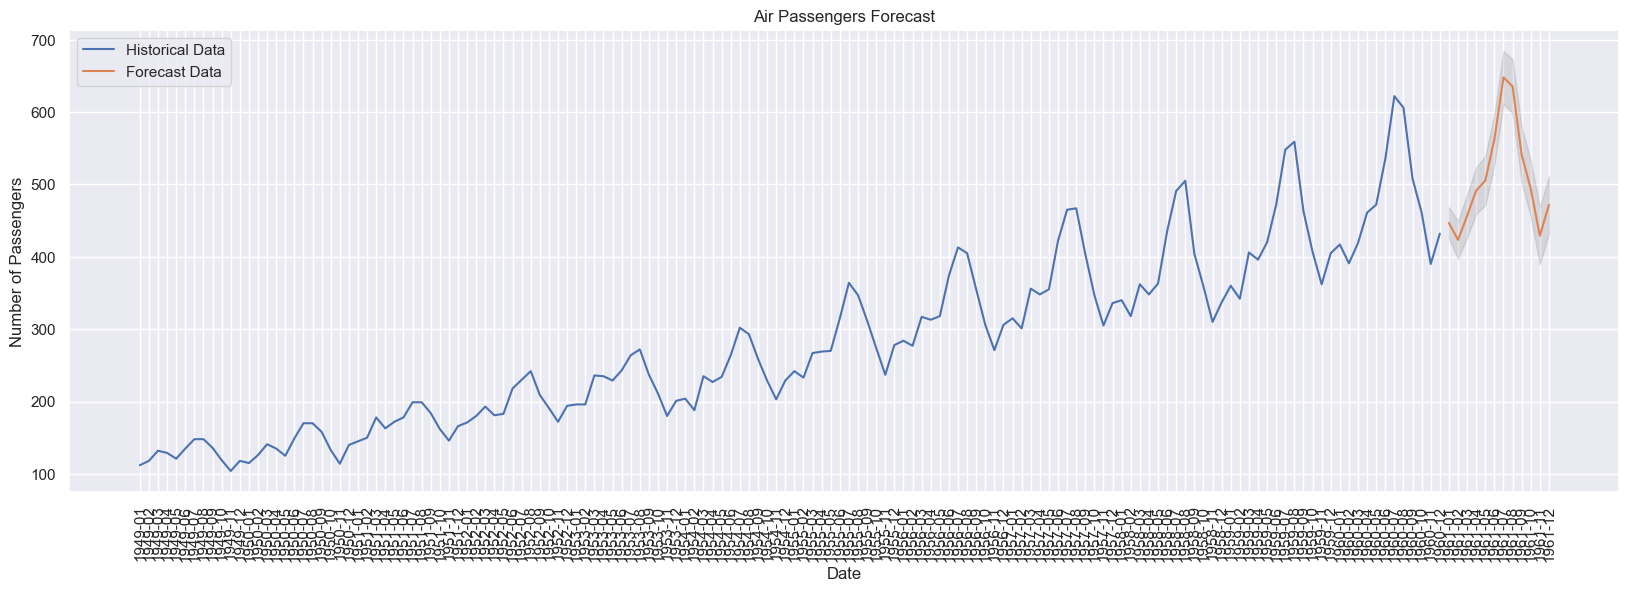

In [17]:
# plot the forecast values

plt.figure(figsize=(20, 6))
plt.plot(df['#Passengers'], label='Historical Data')
plt.plot(forecast_df['Forecast'], label='Forecast Data')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Air Passengers Forecast')
plt.xticks(rotation=90)
plt.legend()
plt.show()